# ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels as sm
import statsmodels.api as smt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

In [3]:
ori_data = pd.read_csv('../data/data_indicators/BTC_data_1d_2019-01-01.csv',index_col= 0)
ori_data['Open time'] = pd.to_datetime(ori_data['Open time'])
ori_data = ori_data.set_index('Open time')

In [4]:
diff_data = pd.Series.diff(ori_data.Close).dropna()
close = ori_data.Close

diff_data_train = diff_data[:int(np.ceil(diff_data.shape[0]*0.8))]
diff_data_test = diff_data[int(np.ceil(diff_data.shape[0]*0.8)):]

Results of Dickey-Fuller Test:
Test Statistic                 -29.5242
pvalue                           0.0000
#Lags Used                       0.0000
Number of Observations Used    768.0000
Critical Value (1%)             -3.4389
Critical Value (5%)             -2.8653
Critical Value (10%)            -2.5688
dtype: float64


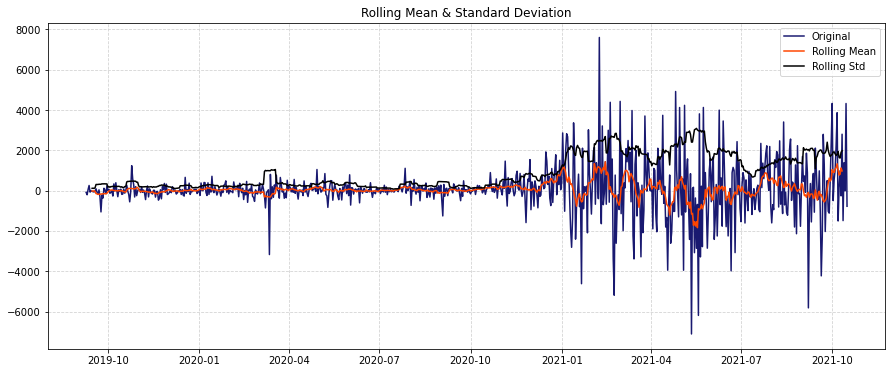

In [5]:
from ts_toolbox import plot_curve
from ts_toolbox import test_stationarity

test_stationarity(diff_data_train)   
plot_curve(diff_data_train)

/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


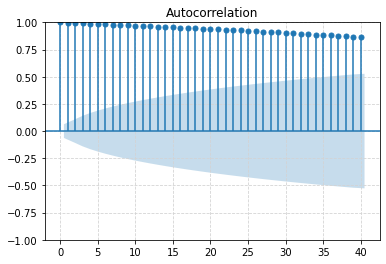

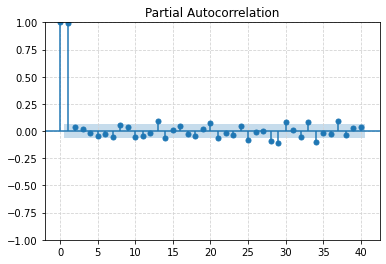

In [6]:
smt.graphics.tsa.plot_acf(close, lags=40, alpha = 0.05)
plt.grid(linestyle = "--",color='lightgrey')         # set grids to the plot
smt.graphics.tsa.plot_pacf(close, lags=40, alpha = 0.05)
plt.grid(linestyle = "--",color='lightgrey')         # set grids to the plot
plt.show()

/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

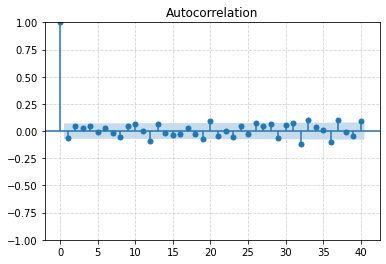

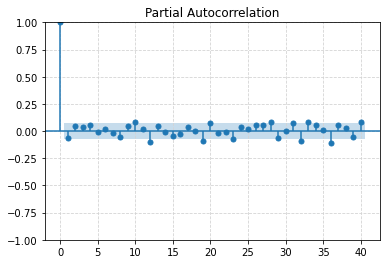

In [7]:
# For differenced time series
ax = plt.figure()
#sns.set_theme(style='darkgrid')
smt.graphics.tsa.plot_acf(diff_data_train, lags=40, alpha = 0.05)
plt.grid(linestyle = "--",color='lightgrey')         # set grids to the plot
smt.graphics.tsa.plot_pacf(diff_data_train, lags=40, alpha = 0.05)
plt.grid(linestyle = "--",color='lightgrey')         # set grids to the plot
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [9]:
p = 2; d = 1; q = 2

In [10]:
m_arima = ARIMA(endog = diff_data_train,order = (p,d,q))

/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
model = m_arima.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  769
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6557.182
Date:                Sat, 30 Apr 2022   AIC                          13124.364
Time:                        15:17:30   BIC                          13147.582
Sample:                    09-09-2019   HQIC                         13133.300
                         - 10-16-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5953      0.203      2.940      0.003       0.198       0.992
ar.L2          0.0970      0.024      4.067      0.000       0.050       0.144
ma.L1         -1.6578      0.206     -8.038      0.0

In [12]:
model.forecast()

2021-10-17 00:00:00+00:00    402.485579
Freq: D, dtype: float64

# PCA

In [12]:
import pandas as pd
ind_data = pd.read_csv('../data/raw_data/All_indicator_1d.csv',index_col= 0)
price_data = pd.read_csv('../data/data_indicators/BTC_data_1d_2019-01-01.csv',index_col= 0)

from ds_toolbox import dp_mv_DropCols

ind_data = dp_mv_DropCols(ind_data,0.5)

# import matplotlib.pyplot as plt
# import missingno as msno

# # missing value EDA
# # reference: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
# msno.matrix(ori_data)
# plt.savefig('Missing values.png')
# plt.show()
ind_data = ind_data.dropna().reset_index(drop = True)

price_data['date'] = pd.to_datetime(price_data['Open time']).dt.strftime('%Y-%m-%d')
data = ind_data.merge(price_data,how = 'left', on='date')
data['direction'] = (data.Close > data.Open).apply(lambda x: 'up' if x else 'down')
data = data.drop(price_data.columns,axis = 1)
label = data.direction
data = data.drop('direction',axis = 1)

In [13]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_arr = scaler.fit_transform(data) 

/Users/cholian/opt/anaconda3/envs/anly565/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

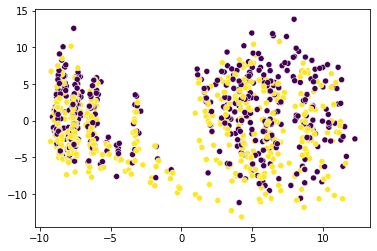

In [14]:

# data_arr = data.to_numpy()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projected = pca.fit_transform(data_arr)

import seaborn as sns
sns.scatterplot(projected[:,0], projected[:,1],c= label.apply(lambda x: 1 if x == 'up' else 0))

In [15]:
import plotly.express as px
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=3)
components = pca.fit_transform(data_arr)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=label,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [31]:
pca = PCA()
components = pca.fit_transform(data_arr)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=label
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [21]:
import umap.umap_ as umap
from sklearn.manifold import TSNE

/Users/cholian/opt/anaconda3/envs/anly565/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [22]:
import matplotlib.pyplot as plt

In [23]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', size = 20):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=color, s = size)
        plt.title(title, fontsize=18)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=color, s = size)
        plt.title(title, fontsize=18)
    if n_components == 3:
        fig = px.scatter_3d(x=u[:,0], y=u[:,1], z=u[:,2],color=color, title=title, color_continuous_scale='blues')
        fig.update_traces(marker=dict(size=size, 
                              line=dict(width=0)))
        fig.update_layout(
            margin=dict(l=0, r=0, t=0, b=0),
            paper_bgcolor="LightSteelBlue",
        )
        fig.show()

In [24]:
def draw_tsne(n_iter=1000, n_components=2, metric='euclidean', title='', size = 20):
    fit = TSNE(
        n_iter=n_iter,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=color, s = size)
        plt.title(title, fontsize=18)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=color, s = size)
        plt.title(title, fontsize=18)
    if n_components == 3:
        fig = px.scatter_3d(x=u[:,0], y=u[:,1], z=u[:,2],color=color,title=title, color_continuous_scale = 'blues')
        fig.update_traces(marker=dict(size=size, 
                                 line=dict(width=0)))
        fig.update_layout(
            margin=dict(l=0, r=0, t=0, b=0),
            paper_bgcolor="LightSteelBlue",
        )
        fig.show()

In [25]:
data = data_arr
color = label
draw_umap(n_components=3, size = 5, title='UMAP Transformation of Patients')

<Figure size 432x288 with 0 Axes>

In [26]:
draw_tsne(n_iter=1000, n_components=3, metric='euclidean', title='', size = 10)

/Users/cholian/opt/anaconda3/envs/anly565/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/cholian/opt/anaconda3/envs/anly565/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<Figure size 432x288 with 0 Axes>

# Lasso

In [93]:
import pandas as pd
import numpy as np

ind_data = pd.read_csv('../data/raw_data/All_indicator_1d.csv',index_col= 0)
price_data = pd.read_csv('../data/data_indicators/BTC_data_1d_2019-01-01.csv',index_col= 0)

from ds_toolbox import dp_mv_DropCols

ind_data = dp_mv_DropCols(ind_data,0.5)

price_data['date'] = pd.to_datetime(price_data['Open time']).dt.strftime('%Y-%m-%d')
data = ind_data.merge(price_data,how = 'left', on='date')

data['y_prediction'] = data.Close.shift(-1)
# data['direction'] = (data.Close > data.Open).apply(lambda x: 'up' if x else 'down')
data = data.drop(price_data.columns,axis = 1)
data = data.dropna().reset_index(drop =True)
y = data.y_prediction.values
# data = data.drop('direction',axis = 1)
X = data.drop('y_prediction',axis = 1).to_numpy()
X_train = X[:int(np.ceil(X.shape[0]*0.8)),:]
X_test = X[int(np.ceil(X.shape[0]*0.8)):,:]

y_train = y[:int(np.ceil(X.shape[0]*0.8))]
y_test = y[int(np.ceil(X.shape[0]*0.8)):]

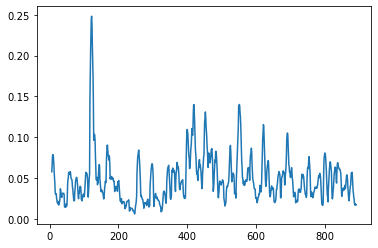

In [94]:
shift_interval = 12
std_price = data.y_prediction.rolling(shift_interval,center=True).std()
mean_price = data.y_prediction.rolling(shift_interval,center=True).mean()
plt.plot(std_price/mean_price)

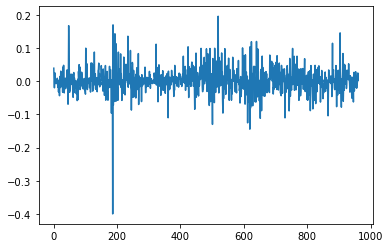

In [95]:
plt.plot((price_data.Close - price_data.Open)/price_data.Open)

In [96]:
daily_std = (price_data.Close - price_data.Open)/price_data.Open

In [97]:
(daily_std>0.0237).value_counts()

False    754
True     208
dtype: int64

In [98]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [99]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train) 
X_test = X_scaler.transform(X_test)

y_train = np.log(y_train)

In [100]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.01)
reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Test data
pred = reg.predict(X_test)

In [136]:
mse_test =mean_squared_error(y_test, np.exp(pred))
mae_test = mean_absolute_error(y_test, np.exp(pred))
mape_test = mean_absolute_percentage_error(y_test, np.exp(pred))

print('MAE test set', round(mae_test, 2))
print('MSE test set', round(mse_test, 2))
print('MAPE test set', round(mape_test, 4))

y_drift = pd.DataFrame(y_test).shift(1).iloc[:,0]

MAE test set 1092.65
MSE test set 2256593.08
MAPE test set 0.0237


In [137]:
result = pd.DataFrame({'y_true':y_test,
                       'y_pred':np.exp(pred),
                       'y_drift':y_drift,
                       'index':[i for i in range(len(pred))] },index = [i for i in range(len(pred))]).melt(id_vars = ['index'])

In [145]:
# drift model accuracy
mean_absolute_percentage_error(y_test[1:], y_drift.to_numpy()[1:])

0.023566100653182473

In [135]:
fig = px.line(result, x="index", y="value", color='variable')
fig.show()

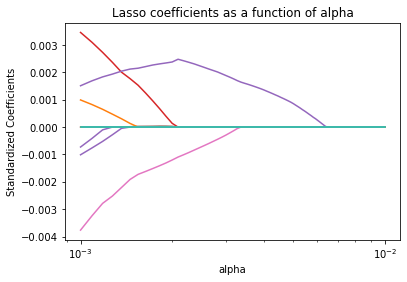

In [162]:
alphas = np.linspace(0.001,0.01,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_[:50])

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

# LSTM

In [80]:
import pandas as pd
import numpy as np

ind_data = pd.read_csv('../data/raw_data/All_indicator_1d.csv',index_col= 0)
price_data = pd.read_csv('../data/data_indicators/BTC_data_1d_2019-01-01.csv',index_col= 0)

from ds_toolbox import dp_mv_DropCols

ind_data = dp_mv_DropCols(ind_data,0.5)

price_data['date'] = pd.to_datetime(price_data['Open time']).dt.strftime('%Y-%m-%d')
data = ind_data.merge(price_data,how = 'left', on='date')

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# plot multiple timeseries
def plot_multiTS(data, cols_idx, date_col):
    
    sns.set_theme(style="darkgrid")

    # cols_idx = [0, 1,3,4]
    features = (len(cols_idx),1)
    date = date_col
    fig, axes = plt.subplots(features[0], features[1], figsize=(features[0]*4,10))

    # data.date = pd.to_datetime(data.date)
    for i in range(features[0]):
        sns.lineplot(x = date,y = data.columns[cols_idx[i]], data = data,ax = axes[i,])
        
    return fig

In [85]:
from ts_toolbox import plot_multiTS

# fig = plot_multiTS(data, [0, 1,3,4], 'date')

In [124]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, y = False):
	'''
	data: pd.DataFrame
	'''
	
	cols, names = list(), list()
	n_vars = data.shape[1]
	col_names = data.columns
	
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(data.shift(i))
		names += [f'{col_names[j]}(t-{i})' for j in range(n_vars)]
  
	if not y:
		# forecast sequence (t, t+1, ... t+n)
		for i in range(0, n_out):
			cols.append(data.shift(-i))
			if i == 0:
				names += [f'{col_names[j]}(t)' for j in range(n_vars)]
			else:
				names += [f'{col_names[j]}(t-{i})' for j in range(n_vars)]
    
	elif y:
		# forecast sequence (t, t+1, ... t+n)
		for i in range(0, n_out):
			cols.append(data[y].shift(-i))
			if i == 0:
				names += [f'{y}(t)']
			else:
				names += [f'{y}(t-{i})']
    
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [113]:
data = data.drop(price_data.columns[price_data.columns != 'Close'],axis = 1)

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data.iloc[:,:] = scaler.fit_transform(data)

In [131]:
data_lstm = series_to_supervised(data, n_in = 10, n_out =1,y = 'Close')

In [133]:
def dp_train_test_split(data, train_rate = 0.8):
    '''
    data: pd.DataFrame
    '''
    data_train = data[:int(np.ceil(data.shape[0]*0.8))]
    data_test = data[int(np.ceil(data.shape[0]*0.8)):]
    
    return [data_train, data_test]
    

In [ ]:
data_lstm

In [132]:
data_lstm

,ind_upperband(t-10),ind_middleband(t-10),ind_lowerband(t-10),ind_dema(t-10),ind_ema(t-10),ind_ht_trendline(t-10),ind_kama(t-10),ind_ma(t-10),ind_mama(t-10),ind_mama.1(t-10),...,ind_MININDEX(t-1),ind_min(t-1),ind_max(t-1),ind_minidx(t-1),ind_maxidx(t-1),ind_MULT(t-1),ind_SUB(t-1),ind_SUM(t-1),Close(t-1),Close(t)
73,0.061360,0.064742,0.087462,0.067017,0.057258,0.050491,0.052021,0.064742,0.057243,0.057243,...,0.075157,0.049301,0.036111,0.075157,0.069110,0.009727,0.009149,0.052799,0.053579,0.052980
74,0.060089,0.063162,0.085617,0.064951,0.055900,0.050854,0.051755,0.063162,0.056872,0.056872,...,0.076200,0.049301,0.036111,0.076200,0.070157,0.009825,0.007777,0.053235,0.052980,0.045467
75,0.058326,0.061986,0.085111,0.064278,0.055255,0.051081,0.051753,0.061986,0.054098,0.054098,...,0.077244,0.049301,0.036111,0.077244,0.073298,0.008564,0.041917,0.047620,0.045467,0.039751
76,0.055236,0.060638,0.085665,0.063588,0.054592,0.051163,0.051670,0.060638,0.053924,0.053924,...,0.078288,0.046532,0.036111,0.078288,0.073298,0.006816,0.062306,0.039359,0.039751,0.040440
77,0.052239,0.059269,0.086080,0.062242,0.053534,0.050873,0.051338,0.059269,0.053644,0.053644,...,0.078288,0.046532,0.036111,0.078288,0.073298,0.006694,0.013161,0.038494,0.040440,0.033993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.616009,0.608284,0.597772,0.579067,0.612231,0.666615,0.626813,0.608284,0.640744,0.640744,...,0.993737,0.647129,0.664918,0.993737,0.998953,0.370982,0.219448,0.582245,0.567852,0.555510
958,0.608752,0.603473,0.595747,0.580476,0.609269,0.665281,0.625854,0.603473,0.638958,0.638958,...,0.993737,0.647129,0.664918,0.993737,0.998953,0.347444,0.106128,0.560895,0.555510,0.551387
959,0.596896,0.595176,0.591554,0.573372,0.601910,0.663122,0.621766,0.595176,0.636221,0.636221,...,1.000000,0.645444,0.664918,1.000000,0.998953,0.341768,0.044711,0.555630,0.551387,0.551678
960,0.590406,0.591147,0.590298,0.573775,0.598988,0.660996,0.620848,0.591147,0.615482,0.615482,...,1.000000,0.645444,0.664918,1.000000,0.998953,0.337863,0.065282,0.552086,0.551678,0.567235
